# One vs All logistic regression model for handwritten digits

In [1]:
def displayData(X):
    for i in range(28):
        plt.subplot(4, 7, i+1)
        plt.imshow(X[i].reshape(8,8))

In [2]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z))
    return g

In [211]:
def costFunction(theta, X, y, _lambda):
    m = y.shape[0]
    n = X.shape[1]
    
    J = 0
    theta=theta.reshape(n,10)
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X@theta)
    J = -1/m * (y*np.log(h)+(1-y)*np.log(1-h)) #-(_lambda/2)*theta[1:,:].T@theta[1:,:])
    J = np.sum(J)
    grad = ((X.T)@(h-y))/m
#     grad[0,:] = 1/m * ((X[:,0]).T@(h-y)) 
#     grad[1:,:] = 1/m * (X[:,1:].T@(h-y)) + (_lambda/m)*theta[1:,:]
    
    grad=grad.reshape(-1)
    
    return J, grad

In [288]:
def computeCost(theta, X, y, _lambda):
    
    J = 0
    m = X.shape[0]
    h = sigmoid(X@theta)
    #J = -1/m * ((y.T@np.log(h) + (1-y).T@np.log(1-h))-(_lambda/2)*theta[1:,:].T@theta[1:,:])
    #J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h))
    J = -1/m * (y*np.log(h)+(1-y)*np.log(1-h))
    J = np.sum(J)
    dtheta = ((X.T)@(h-y))/m
    
    return J, dtheta

In [289]:
def gradientDescent(X, y ,theta, alpha, _lambda, num_iters):
    m = y.shape[0]
    
    J_history = []
    dtheta = np.zeros(theta.shape)
    
    for iter in range(num_iters):
        
        J,  dtheta= computeCost(theta, X, y, _lambda)
        J_history.append(J)
        
        theta = theta - alpha*dtheta
    return theta, J_history

In [347]:
def train(X, y, num_labels, _lambda):
    m, n = X.shape
    
    all_theta = np.zeros((n+1, num_labels))
    
    X = np.append(np.ones((m,1)), X, axis=1)
    theta_0 = np.zeros((n+1, num_labels))
    J = lambda theta: costFunction(theta, X, y, _lambda)[0]
    dJ = lambda theta: costFunction(theta, X, y, _lambda)[1]
    all_theta = optimize.fmin_cg(J, theta_0, fprime=dJ, maxiter=400,gtol=0.0001,callback=call_back_fminc)
    
    return all_theta.reshape(n+1,num_labels)

itera = 0
X_ = np.append(np.ones((m,1)), X, axis=1)
J_ = lambda theta: costFunction(theta, X_, labels, 0)[0]
                     
def call_back_fminc(theta):
    global itera
    tqdm_train.set_description(f'loss : {J_(theta):.4f} iter: {itera+1}')
    itera += 1    
    tqdm_train.update(1)

In [348]:
def predict(X, theta):
    m = X.shape[0]
    num_labels = theta.shape[0]
    
    p = np.zeros((X.shape[0], 1))
    
    X = np.append(np.ones((m,1)), X, axis=1)
    
    
    h = sigmoid(X@theta)
    
    p = np.argmax(h, axis=1)
    
    return p.reshape(-1,1)

# Plotting some examples

In [344]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# from sklearn.datasets import load_digits
# from scipy import optimize
# from sklearn.preprocessing import label_binarize


# digits = load_digits()

# X = digits.data
# y = digits.target.reshape(-1, 1)

# displayData(X)

# Training model

In [319]:
m = X.shape[0]
X_t = torch.from_numpy(X)
X_t = torch.cat([torch.ones(m,1,dtype=X_t.dtype), X_t], dim=1).float()
y_t = torch.eye(10)[torch.from_numpy(y)].squeeze().float()
theta = torch.zeros(X_t.shape[1], 10, dtype=X_t.dtype, requires_grad=True)

l = X_t.mm(theta)
nl = torch.sigmoid(l)

loss = - 1/m * (y_t*torch.log(nl) + (1-y_t)*torch.log(1-nl))
loss.sum().backward()
theta_grad = theta.grad

In [320]:
X_ = np.concatenate([np.ones((m,1)), X], axis=1)
theta0 = np.zeros((X_.shape[1], 10))
y_ = np.eye(10)[y].squeeze()
loss_, grad_ = computeCost(theta0, X_, y_, 0)

In [321]:
loss.sum().item(), loss_

(6.931519031524658, 6.931471805599455)

In [322]:
np.linalg.norm(grad_ - theta_grad.numpy())

1.481070835328663e-05

In [324]:
# from tqdm.notebook import tqdm

# theta_0 = np.zeros((X_.shape[1]*10))
# grad_apr = np.zeros_like(theta_0)
# perturb = np.zeros_like(theta_0)
# e = 0.001
# J = lambda theta: costFunction(theta, X_, y_, 0)[0]
# # dJ = lambda theta: costFunction(theta, X, y, _lambda)[1]

# for i in tqdm(range(len(theta_0))):
#     perturb[i] = e
#     grad_apr[i] =  J(theta_0 + perturb) - J(theta_0 - perturb) 
#     grad_apr[i] /= (2*e)
#     perturb[i] = 0

In [325]:
np.linalg.norm(grad_apr.reshape(-1,10) - theta_grad.numpy())

1.4810708511535781e-05

In [349]:
m = digits.data.shape[0]

input_layer_size = m
num_labels = 10

labels=np.unique(y)

labels=label_binarize(y, classes=labels)
tqdm_train = tqdm(total=400,
                     position=0)

_lambda = 0

all_theta = train(X, labels, num_labels, _lambda)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


         Current function value: 0.152575
         Iterations: 400
         Function evaluations: 641
         Gradient evaluations: 641


# Predicting for all training examples and calculating the model accuracy

In [350]:
y_predict = predict(X, all_theta)
print('train accuracy: ',np.mean(1*(y_predict==y))*100,'%')

train accuracy:  99.27657206455203 %


# Predicting for one random training example

Text(0.5, 1.0, 'predicted: 3')

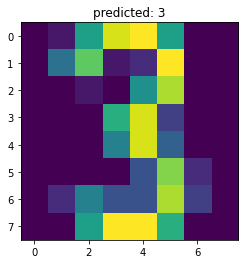

In [359]:
random = np.random.randint(m)
example = X[random].reshape(1,-1)
predicted = predict(example, all_theta).item()
plt.imshow(example.reshape(8,8))
plt.title('predicted: '+str(predicted))